# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/python_learning_exam_performance.csv")
df.head()

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_id,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
age,3000.0,35.327000,11.302182,16.0,26.00,36.0,45.00,54.0
weeks_in_course,3000.0,8.121000,4.275019,1.0,5.00,8.0,12.00,15.0
hours_spent_learning_per_week,3000.0,7.035267,2.936134,0.0,5.00,7.0,9.00,17.1
practice_problems_solved,3000.0,59.983667,7.713056,35.0,55.00,60.0,65.00,87.0
projects_completed,3000.0,2.001333,1.395701,0.0,1.00,2.0,3.00,9.0
tutorial_videos_watched,3000.0,39.896667,6.263258,19.0,35.00,40.0,44.00,63.0
uses_kaggle,3000.0,0.400667,0.490115,0.0,0.00,0.0,1.00,1.0
participates_in_discussion_forums,3000.0,0.498333,0.500081,0.0,0.00,0.0,1.00,1.0
debugging_sessions_per_week,3000.0,4.973333,2.236729,0.0,3.00,5.0,6.00,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

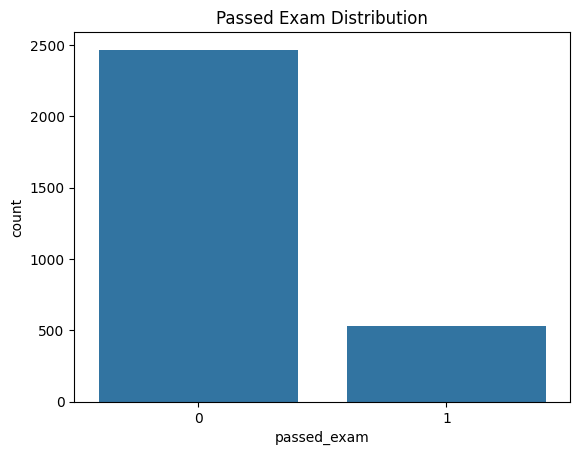


Class Distribution:
 passed_exam
0    82.266667
1    17.733333
Name: proportion, dtype: float64


In [ ]:
# Passed exam distribution
sns.countplot(x='passed_exam', data=df)
plt.title('Passed Exam Distribution')
plt.show()

print("\nClass Distribution:\n", df['passed_exam'].value_counts(normalize=True) * 100)

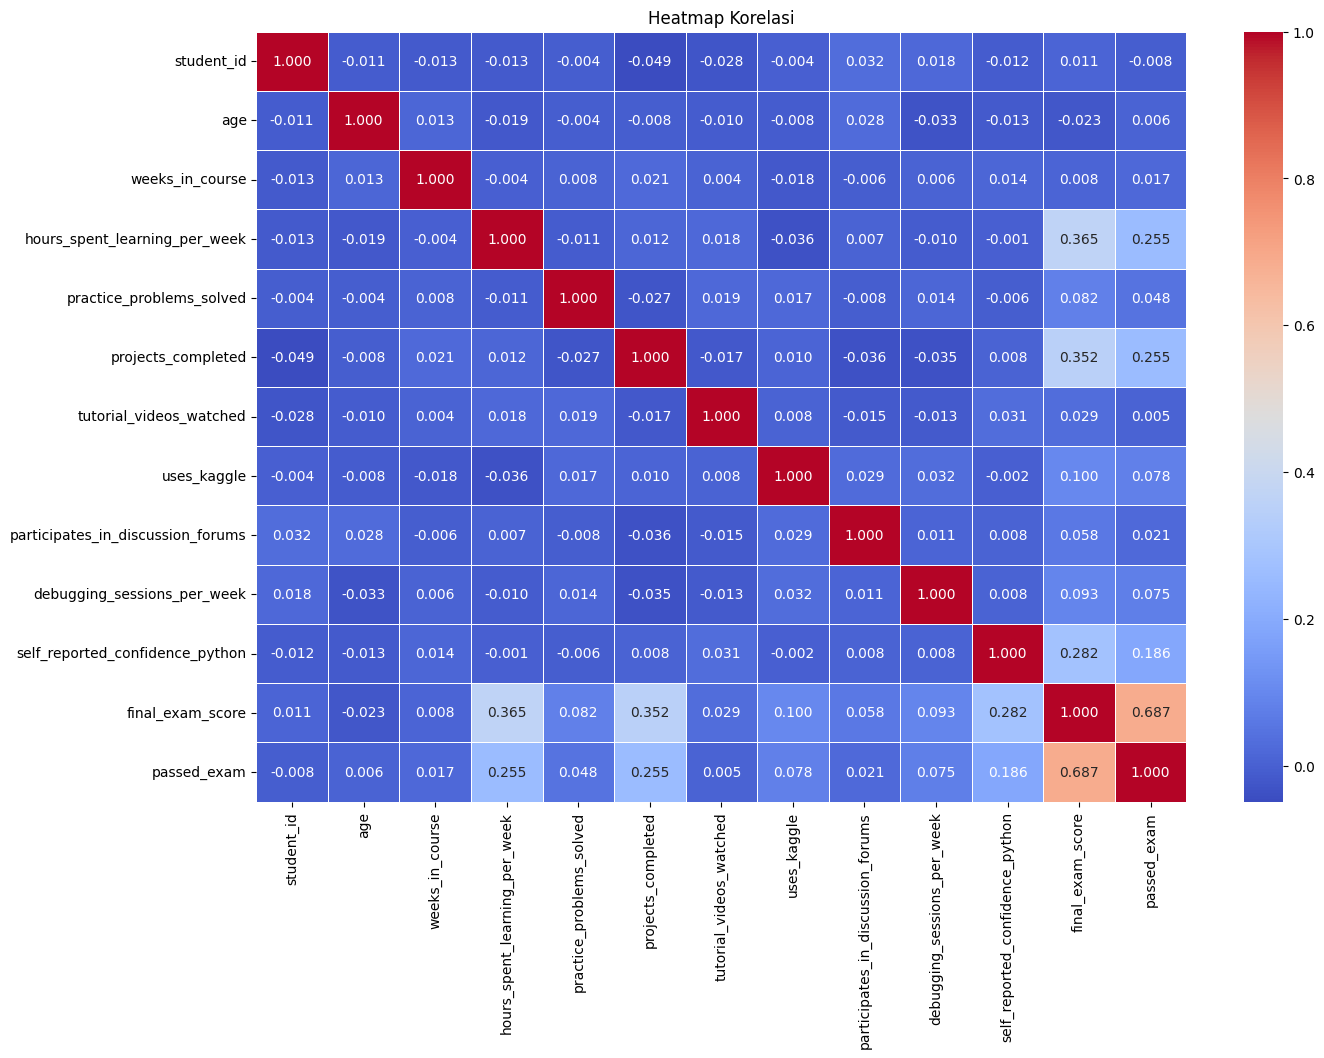

In [ ]:
# Corellation Matrix
num_features = df.select_dtypes(include=[np.number])

plt.figure(figsize=(15, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id
df = df.drop(columns=['student_id'])
df.head()

,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0


In [ ]:
# Missing values handling
df['prior_programming_experience'] = df['prior_programming_experience'].fillna('No Experience')

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# NaN pada kolom numerik (selain programming experience) diisi dengan mean
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# NaN pada kolom kategorikal (selain programming experience) dengan modus
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

df.isnull().sum()

,0
age,0
country,0
prior_programming_experience,0
weeks_in_course,0
hours_spent_learning_per_week,0
practice_problems_solved,0
projects_completed,0
tutorial_videos_watched,0
uses_kaggle,0
participates_in_discussion_forums,0


In [ ]:
# Duplicate handling
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [ ]:
bins = [15, 18, 24, 34, 44, 55]
labels = ['Teen', 'Young Adult', 'Adult', 'Mid Adult', 'Senior Adult']

df['age_group'] = pd.cut(
    df['age'],
    bins=bins,
    labels=labels
)

df = df.drop(columns=['age'])

df.head()

,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam,age_group
0,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0,Senior Adult
1,Nigeria,No Experience,15,14.2,52,1,32,0,0,5,7,31.9,0,Mid Adult
2,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0,Adult
3,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0,Young Adult
4,UK,No Experience,3,3.5,62,1,47,1,0,3,7,24.8,0,Mid Adult


In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()

num_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[num_columns] = scaler.fit_transform(df[num_columns])

df[num_columns].head()

,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,0.785714,0.713450,0.480769,0.111111,0.113636,0.0,1.0,0.235294,1.000000,0.538,0.0
1,1.000000,0.830409,0.326923,0.111111,0.295455,0.0,0.0,0.294118,0.666667,0.319,0.0
2,0.285714,0.450292,0.692308,0.111111,0.545455,0.0,0.0,0.352941,0.222222,0.594,0.0
3,0.214286,0.327485,0.557692,0.222222,0.477273,1.0,0.0,0.176471,1.000000,0.588,0.0
4,0.142857,0.204678,0.519231,0.111111,0.636364,1.0,0.0,0.176471,0.666667,0.248,0.0


In [ ]:
# Categorical label encoding
encoders = {}

cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols_list = cat_cols.tolist()

for col in cat_cols_list:
    encoder = LabelEncoder()
    df[col] = encoder.fit_transform(df[col])
    encoders[col] = encoder

df.head()

,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam,age_group
0,7,1,0.785714,0.713450,0.480769,0.111111,0.113636,0.0,1.0,0.235294,1.000000,0.538,0.0,2
1,5,3,1.000000,0.830409,0.326923,0.111111,0.295455,0.0,0.0,0.294118,0.666667,0.319,0.0,1
2,3,2,0.285714,0.450292,0.692308,0.111111,0.545455,0.0,0.0,0.352941,0.222222,0.594,0.0,0
3,5,1,0.214286,0.327485,0.557692,0.222222,0.477273,1.0,0.0,0.176471,1.000000,0.588,0.0,4
4,8,3,0.142857,0.204678,0.519231,0.111111,0.636364,1.0,0.0,0.176471,0.666667,0.248,0.0,1


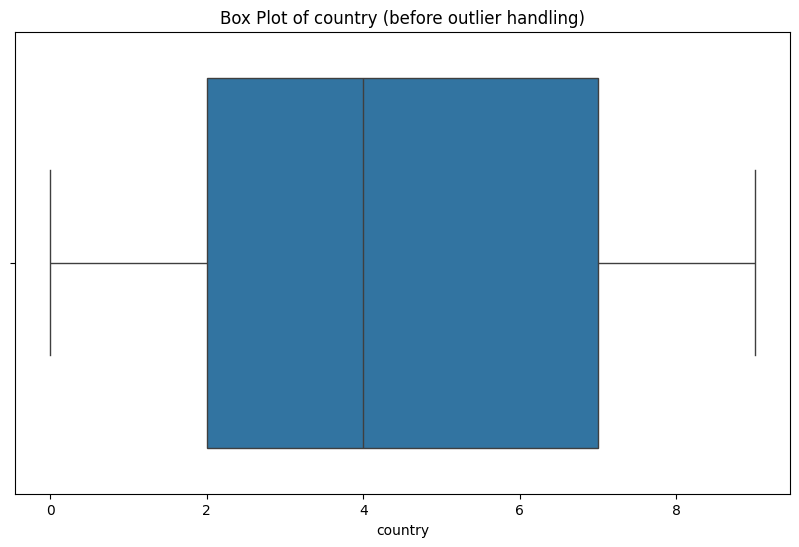

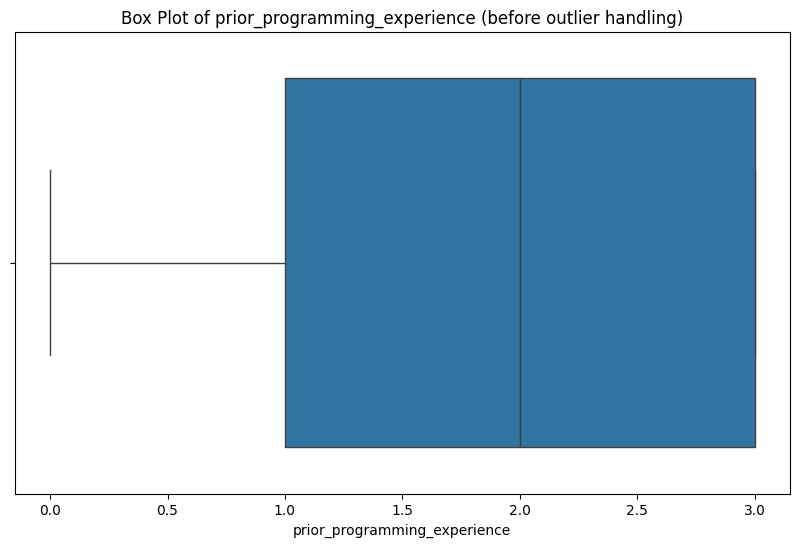

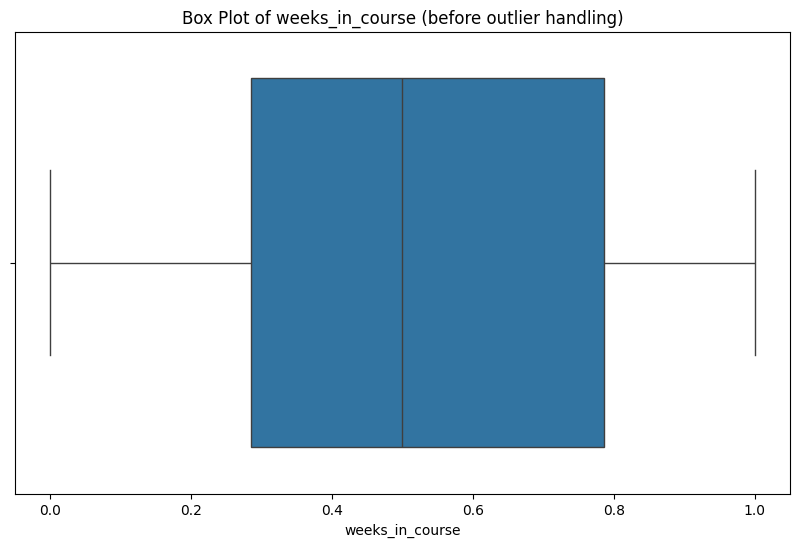

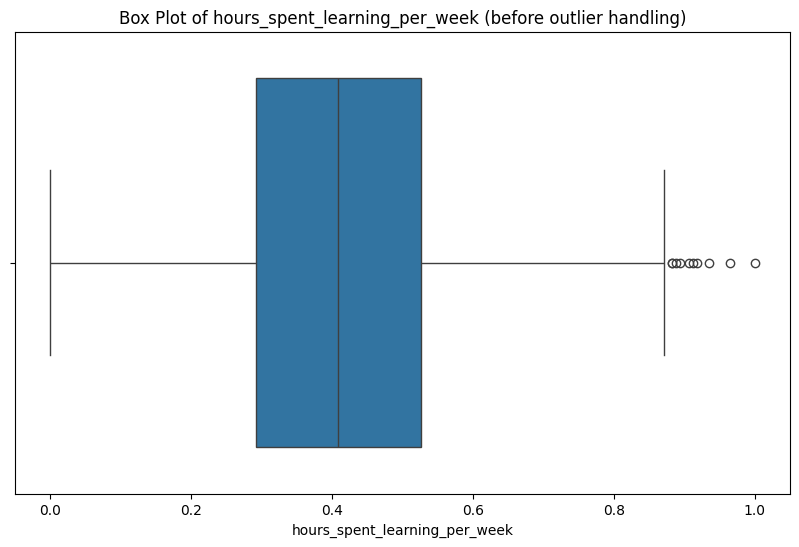

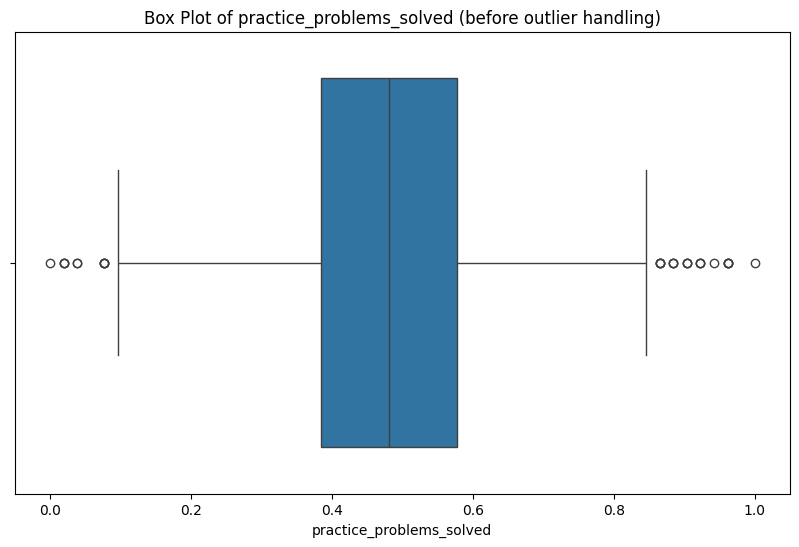

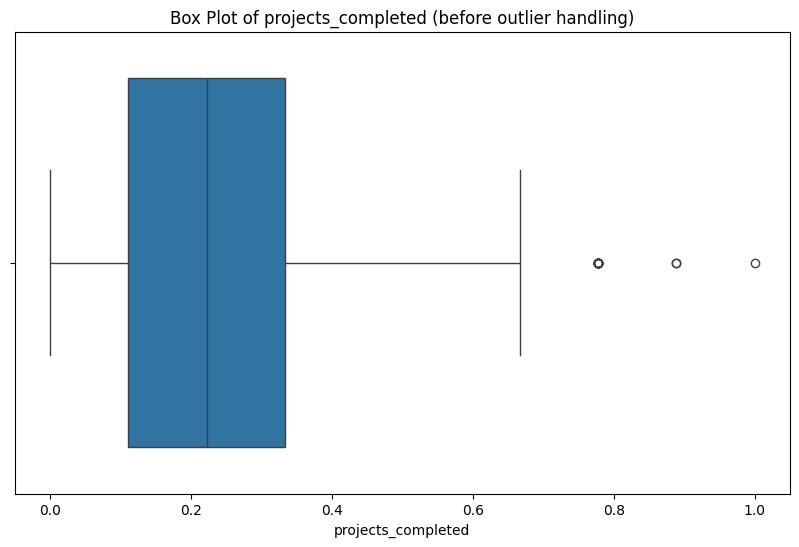

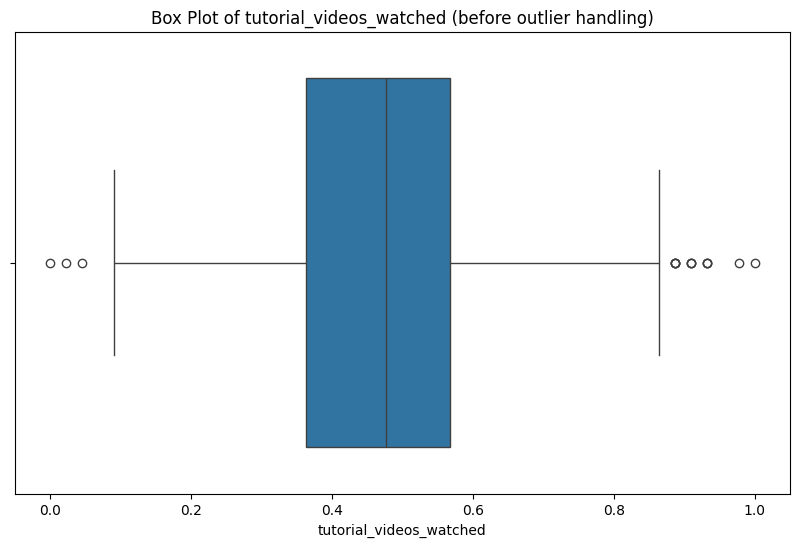

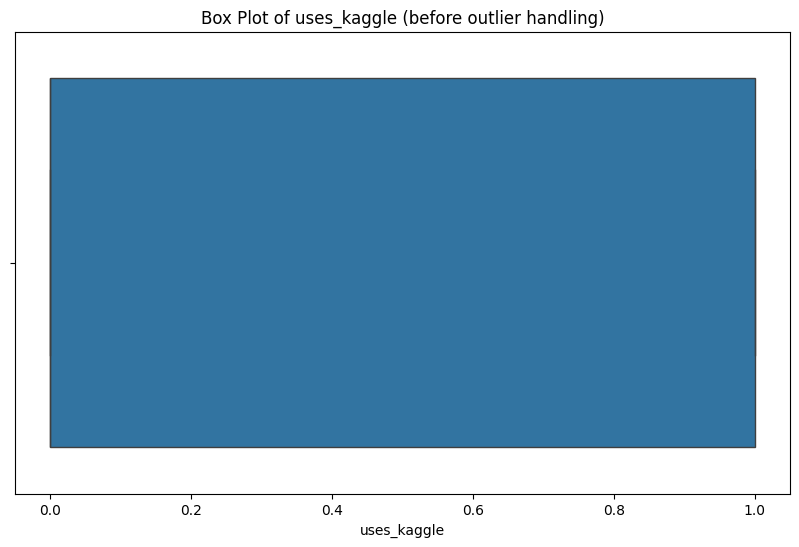

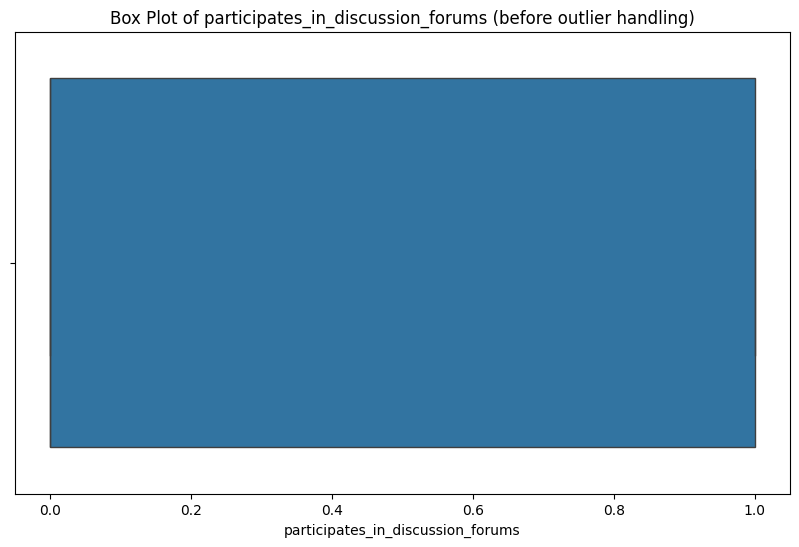

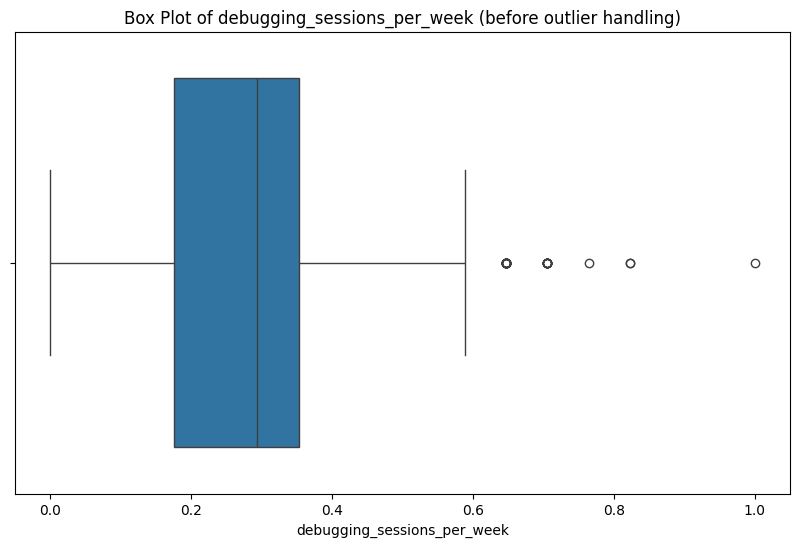

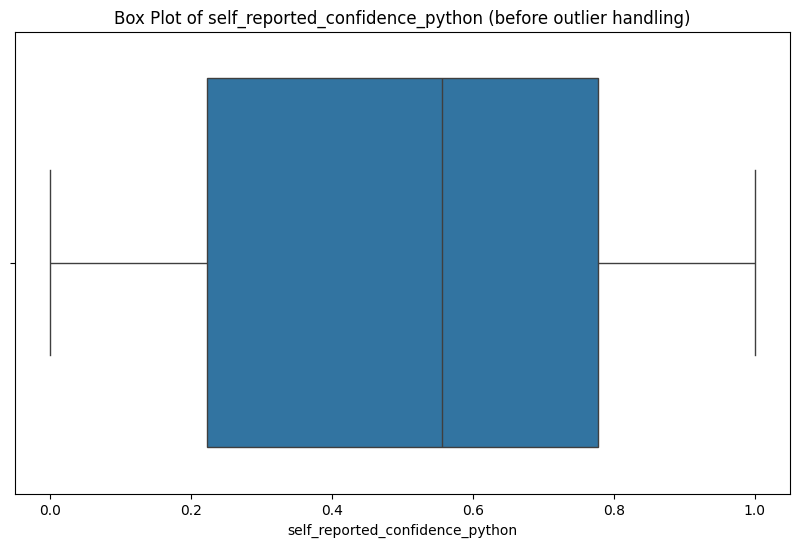

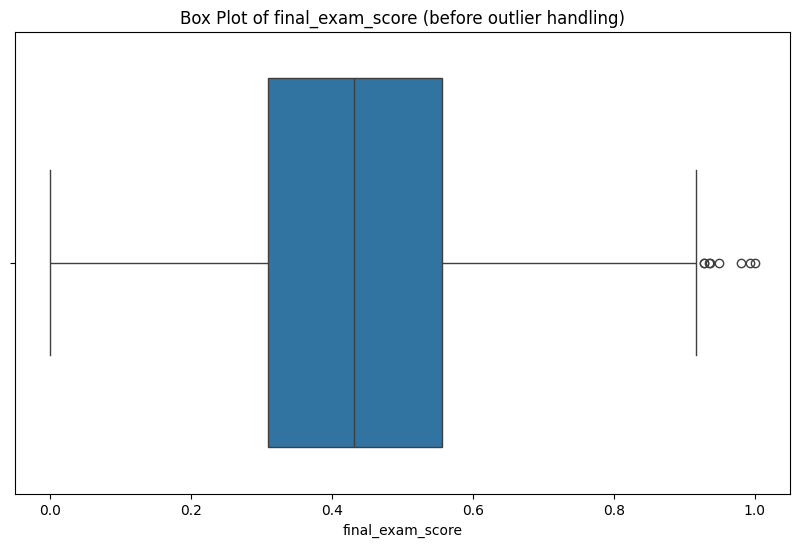

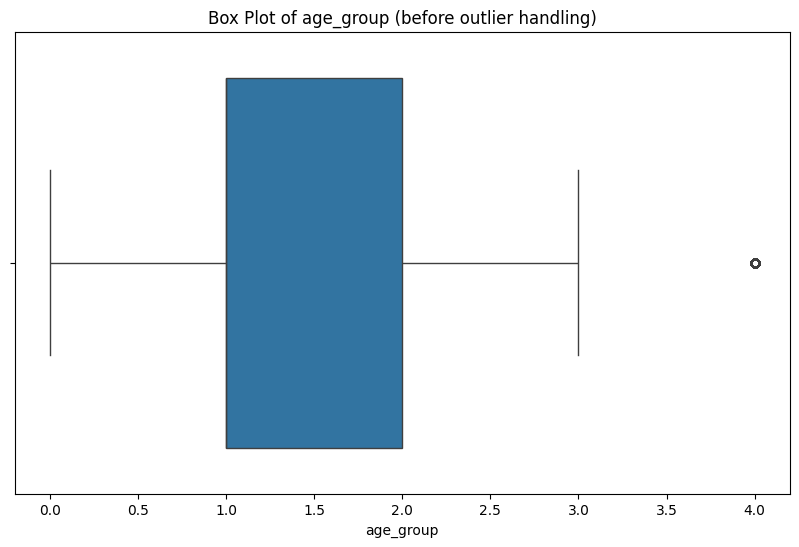

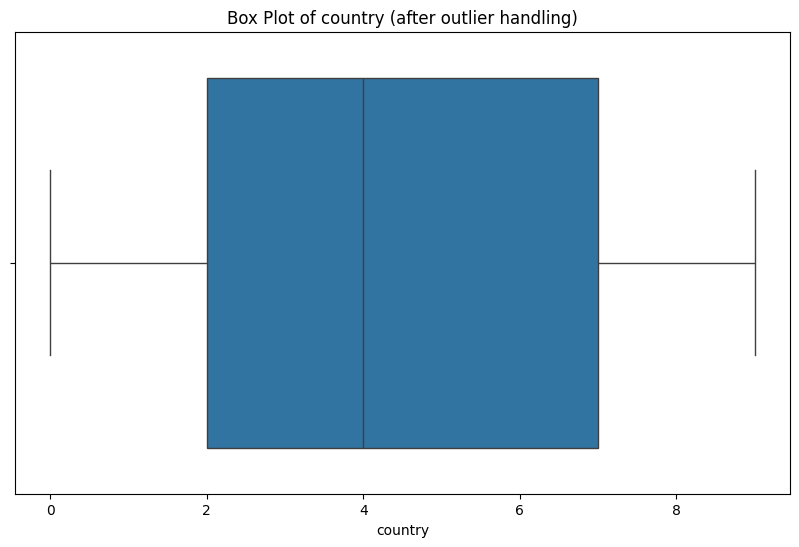

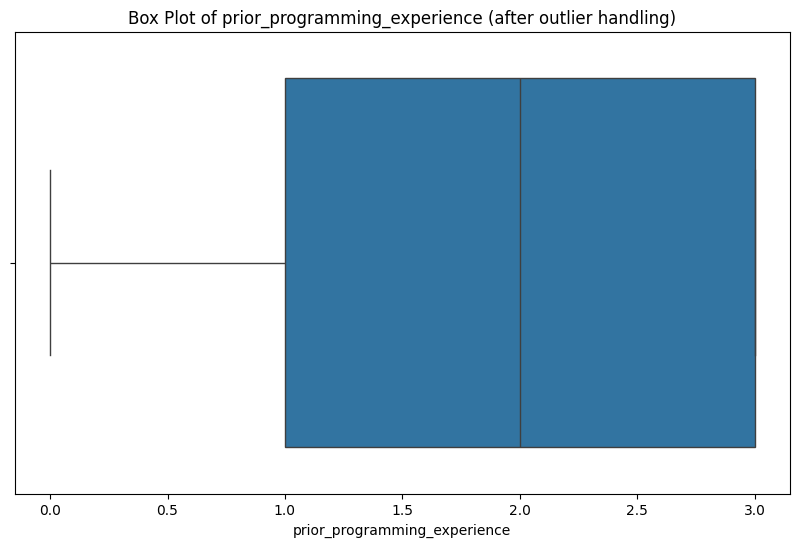

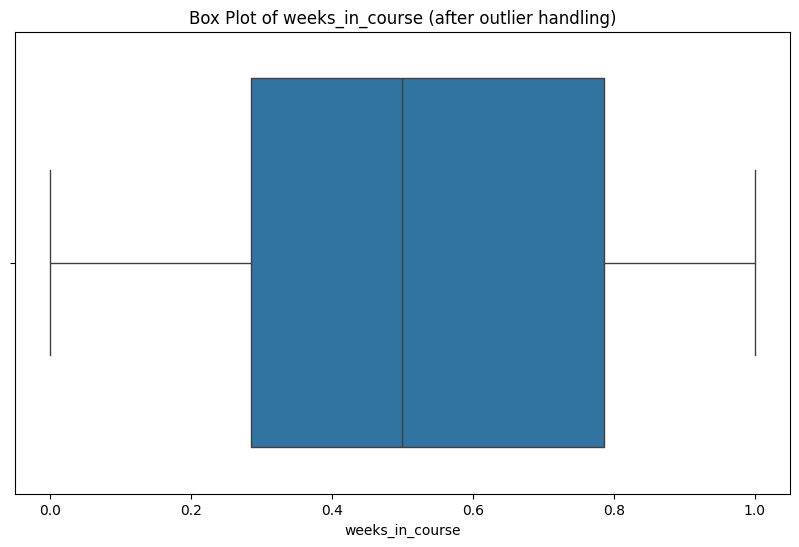

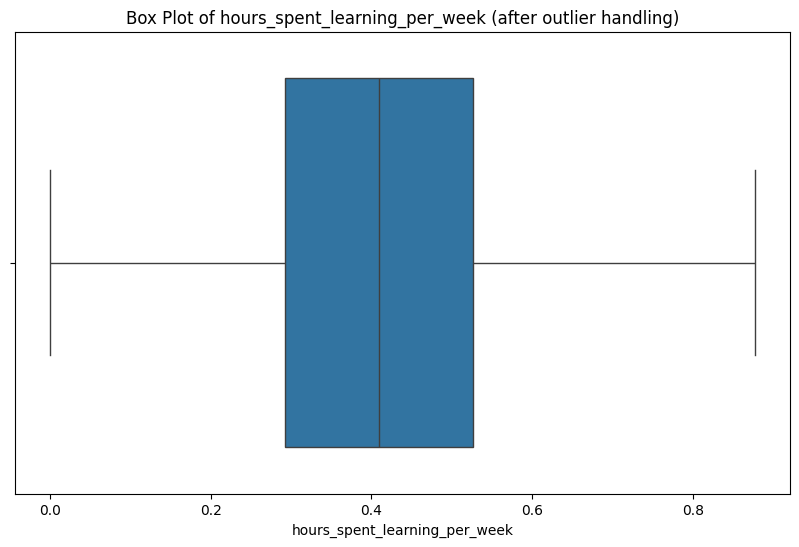

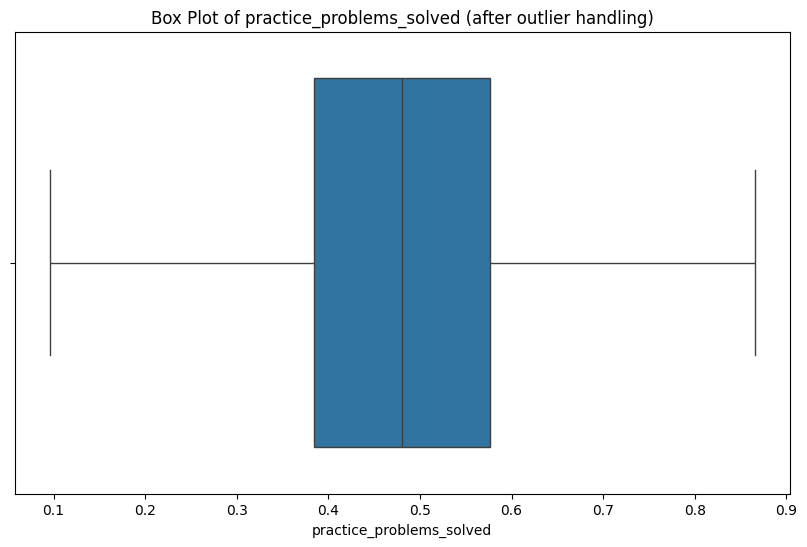

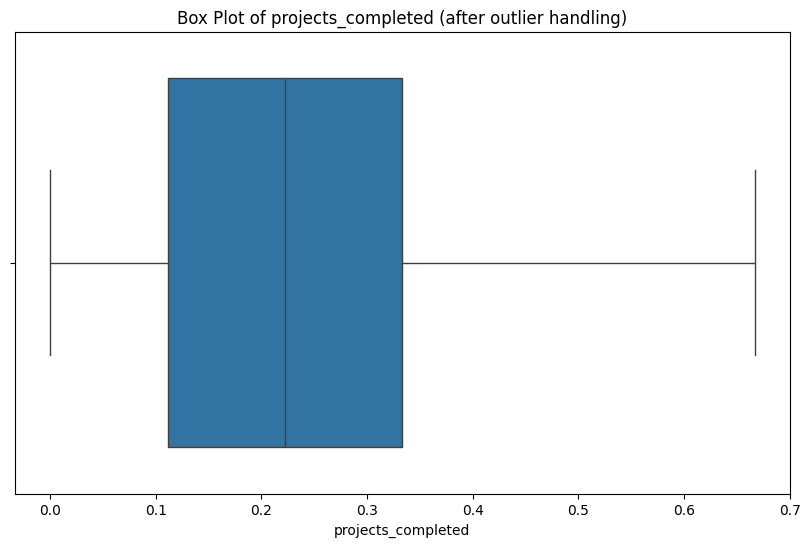

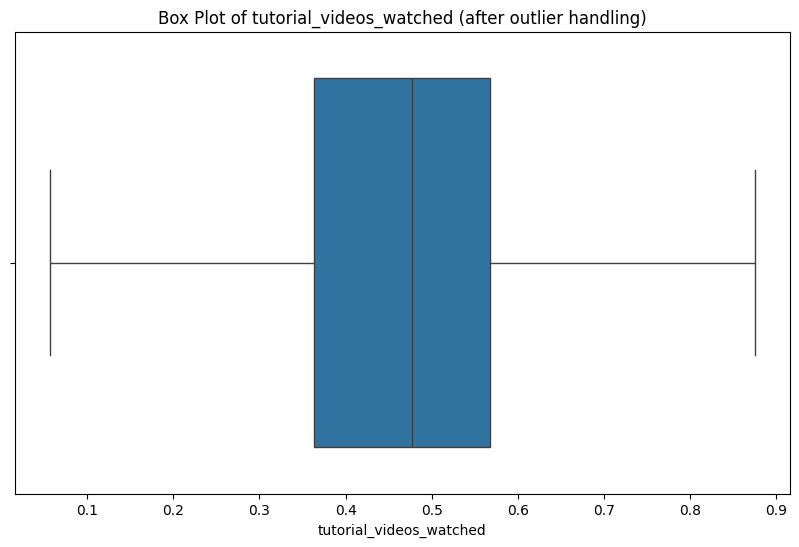

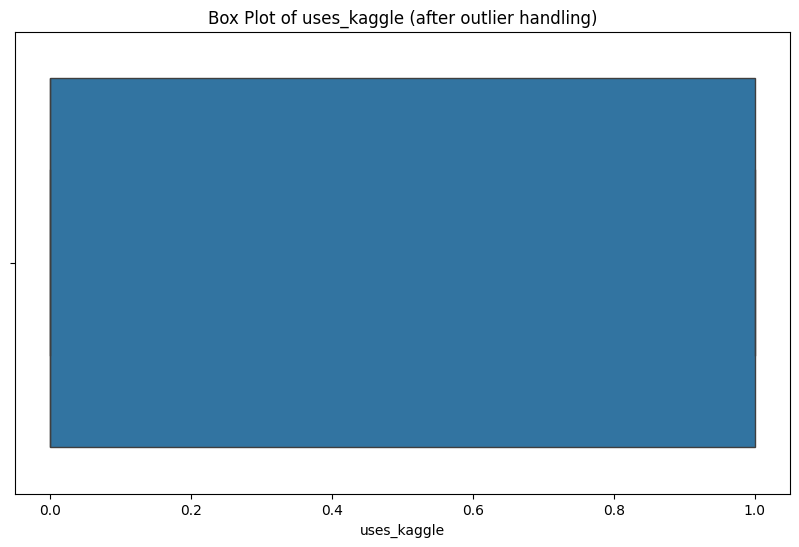

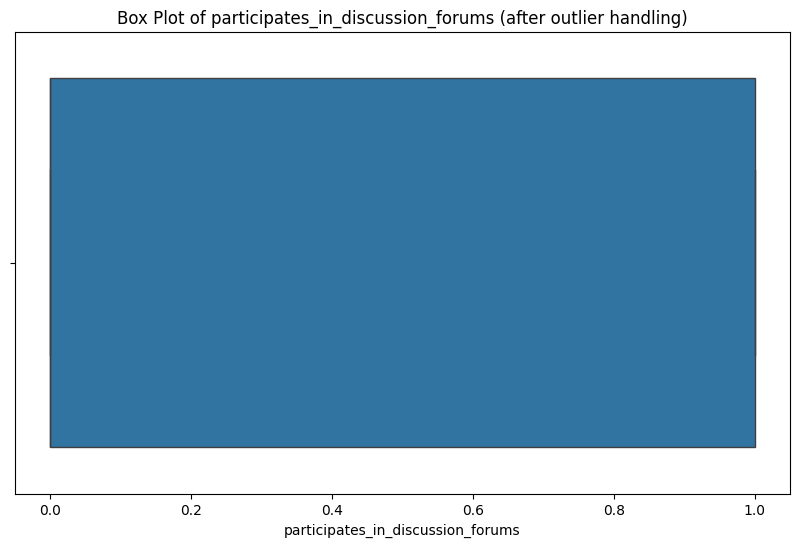

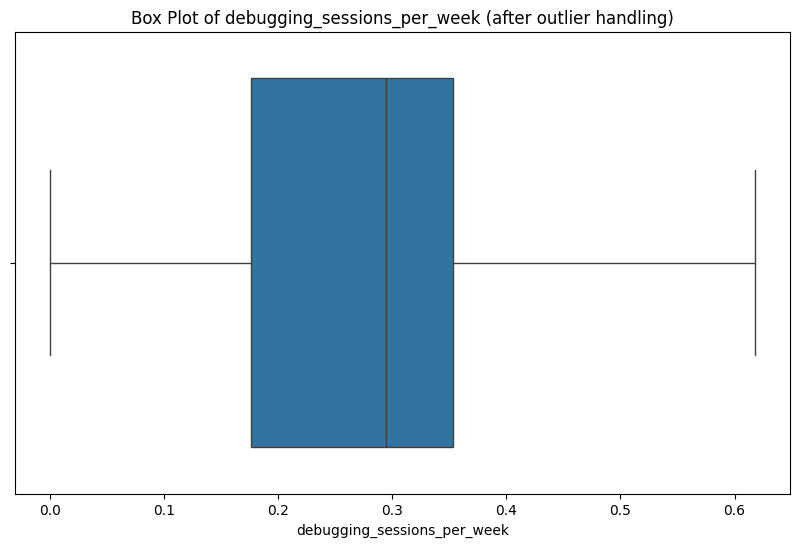

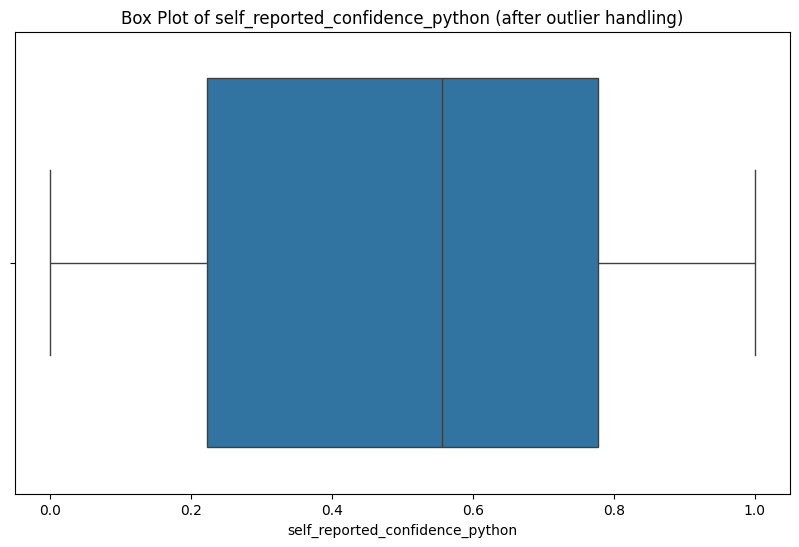

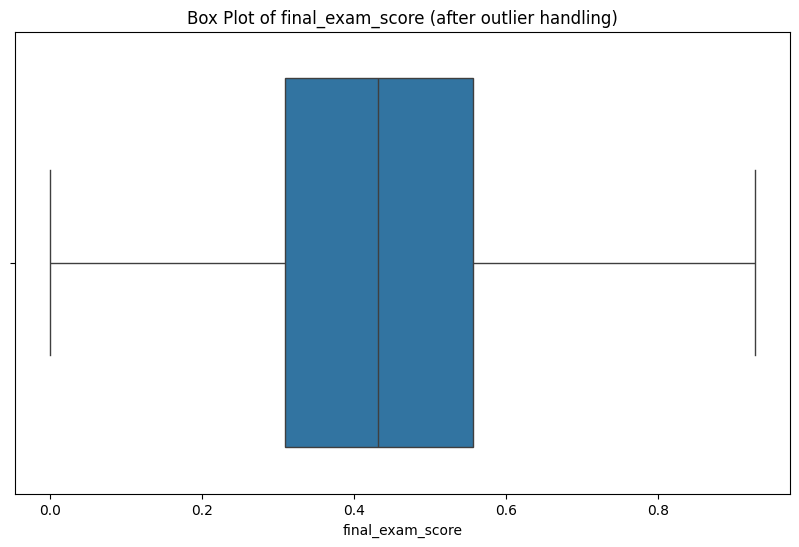

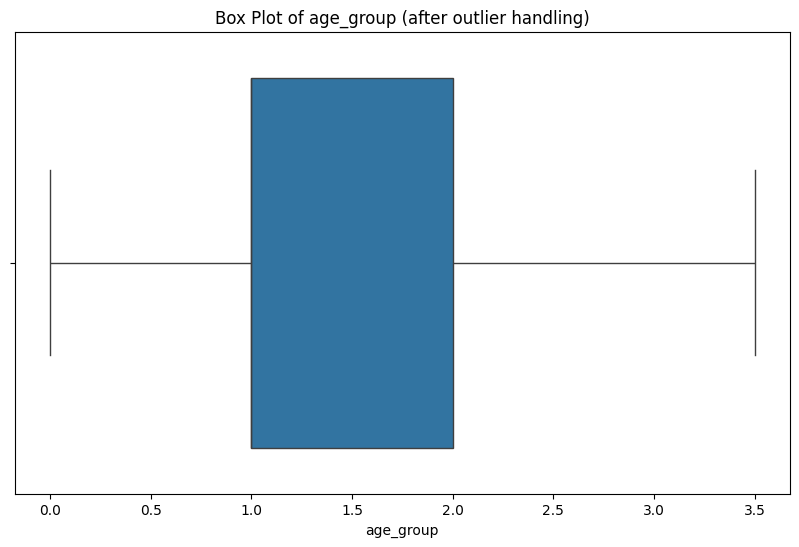

In [ ]:
# Outlier handling
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for feature in num_cols:
    if feature == 'passed_exam':
        continue

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} (before outlier handling)')
    plt.show()

# Quantile outlier handling
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

for feature in num_cols:
    if feature == 'passed_exam':
        continue

    df[feature] = df[feature].clip(
        lower=lower_bound[feature],
        upper=upper_bound[feature]
    )

for feature in num_cols:
    if feature == 'passed_exam':
        continue

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot of {feature} (after outlier handling)')
    plt.show()

In [ ]:
df.head()

,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam,age_group
0,7,1,0.785714,0.713450,0.480769,0.111111,0.113636,0.0,1.0,0.235294,1.000000,0.538,0.0,2.0
1,5,3,1.000000,0.830409,0.326923,0.111111,0.295455,0.0,0.0,0.294118,0.666667,0.319,0.0,1.0
2,3,2,0.285714,0.450292,0.692308,0.111111,0.545455,0.0,0.0,0.352941,0.222222,0.594,0.0,0.0
3,5,1,0.214286,0.327485,0.557692,0.222222,0.477273,1.0,0.0,0.176471,1.000000,0.588,0.0,3.5
4,8,3,0.142857,0.204678,0.519231,0.111111,0.636364,1.0,0.0,0.176471,0.666667,0.248,0.0,1.0


In [ ]:
# Convert to CSV
df.to_csv('python_learning_exam_performance_preprocessing.csv')

In [ ]:
# Download file CSV
files.download('python_learning_exam_performance_preprocessing.csv')